# Data Science Technical Assessment

In [582]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [583]:
data = pd.read_csv('windturbines.csv')
data

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,NaN,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,NaN,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,NaN,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_6757,2018-12-25 15:33:20,238.819424,-99.000000,45.443914,15.115323,44.759643,47.282101,2888.134079,95.389974,...,44.827154,492.081520,1964.502895,42.744596,ABC,NaN,4.857385,0.367140,24.287767,14.851089
4,WM_21521,2019-05-04 03:13:20,10.722890,NaN,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,NaN,0.453374,27.971650,3.519074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28195,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934
28196,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195
28197,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,43.576510,534.209913,1951.728713,88.319152,D,Medium,NaN,0.380264,28.533850,11.096599
28198,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,44.973415,568.504898,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239


## Describing and cleaning the data

In [584]:
data.describe()

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
count,27927.000000,24750.000000,28198.000000,27984.000000,28199.000000,28188.000000,28176.000000,28188.000000,2.549300e+04,28200.000000,25837.000000,23097.000000,28199.000000,27628.000000,23107.000000,28200.000000,27657.000000,27993.000000
mean,69.037071,0.383727,40.085387,-9.654038,41.027755,42.614239,1710.819803,65.027857,5.318506e+04,32.735091,20.799761,306.888883,1575.560011,25.849894,2.254034,0.397249,25.887052,6.130529
std,76.275645,44.278534,27.204430,47.918161,43.663605,6.124546,827.205537,19.816499,1.875036e+05,7.703391,54.356431,134.055900,483.326394,32.423943,11.275602,0.061158,7.773609,2.697520
min,-496.211029,-99.000000,-99.000000,-146.259543,-244.974098,3.167151,500.000000,33.893779,-1.188624e+06,-30.000000,-999.000000,0.000000,-1005.222988,-136.732217,-99.000000,0.200111,-30.295253,0.962305
25%,20.883502,7.948900,41.633238,-1.197652,40.557952,41.911365,870.340239,41.198509,1.679492e+04,27.311644,40.448386,238.627752,1268.134043,13.722808,2.544859,0.347445,24.447658,4.059505
50%,93.302129,16.102410,43.686082,-0.495608,43.221735,43.525297,2031.849540,70.729533,1.819113e+04,32.605195,42.786832,271.427656,1678.238404,32.977192,3.453333,0.398591,25.957739,5.764710
75%,95.268058,23.687285,45.673685,5.495030,45.879425,45.174246,2462.585729,78.945849,1.181133e+05,38.232387,44.494543,404.153517,1829.054007,41.550520,4.357862,0.449354,27.477854,7.947195
max,601.455670,80.217444,169.820455,165.932123,999.000000,50.000000,3000.000000,100.000000,1.272552e+06,55.000000,323.000000,569.966479,4693.481933,236.883264,18.209800,0.499975,78.351335,20.175358


In [585]:
data.dtypes

tracking_id                        object
datetime                           object
wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
turbine_status                     object
cloud_level                        object
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
dtype: object

In [586]:
num_rows = data.shape[0]
num_cols = data.shape[1]
print("number of rows/entries:", num_rows )
print("number of columns", num_cols)

number of rows/entries: 28200
number of columns 22


In [587]:
null_val_sums1 = data.isnull().sum()
duplicate1 = data[data.duplicated()].shape[0]
pd.DataFrame({"Column": null_val_sums1.index, "Number of Null Values": null_val_sums1.values,
              "Number of Duplicate Values":duplicate1, "Proportion": null_val_sums1.values / len(data), "Data Type": data.dtypes })

,Column,Number of Null Values,Number of Duplicate Values,Proportion,Data Type
tracking_id,tracking_id,0,0,0.000000,object
datetime,datetime,0,0,0.000000,object
wind_speed(m/s),wind_speed(m/s),273,0,0.009681,float64
atmospheric_temperature(°C),atmospheric_temperature(°C),3450,0,0.122340,float64
shaft_temperature(°C),shaft_temperature(°C),2,0,0.000071,float64
blades_angle(°),blades_angle(°),216,0,0.007660,float64
gearbox_temperature(°C),gearbox_temperature(°C),1,0,0.000035,float64
engine_temperature(°C),engine_temperature(°C),12,0,0.000426,float64
motor_torque(N-m),motor_torque(N-m),24,0,0.000851,float64
generator_temperature(°C),generator_temperature(°C),12,0,0.000426,float64


In [588]:
data.dropna(subset=['turbine_status'], inplace=True)
data.dropna(subset=['cloud_level'], inplace=True)

data.reset_index(drop=True, inplace=True)

In [589]:
# replacing missing values in numerical columns with the mean
num_cols = ['wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)', 'atmospheric_pressure(Pascal)', 'windmill_body_temperature(°C)', 'wind_direction(°)','resistance(ohm)','rotor_torque(N-m)','blade_length(m)','windmill_height(m)','windmill_generated_power(kW/h)']
for col in num_cols:
    mean = data[col].mean()
    data[col].fillna(mean, inplace=True)

In [590]:
null_val_sums1 = data.isnull().sum()
duplicate1 = data[data.duplicated()].shape[0]
pd.DataFrame({"Column": null_val_sums1.index, "Number of Null Values": null_val_sums1.values,
              "Number of Duplicate Values":duplicate1, "Proportion": null_val_sums1.values / len(data), "Data Type": data.dtypes })

,Column,Number of Null Values,Number of Duplicate Values,Proportion,Data Type
tracking_id,tracking_id,0,0,0.0,object
datetime,datetime,0,0,0.0,object
wind_speed(m/s),wind_speed(m/s),0,0,0.0,float64
atmospheric_temperature(°C),atmospheric_temperature(°C),0,0,0.0,float64
shaft_temperature(°C),shaft_temperature(°C),0,0,0.0,float64
blades_angle(°),blades_angle(°),0,0,0.0,float64
gearbox_temperature(°C),gearbox_temperature(°C),0,0,0.0,float64
engine_temperature(°C),engine_temperature(°C),0,0,0.0,float64
motor_torque(N-m),motor_torque(N-m),0,0,0.0,float64
generator_temperature(°C),generator_temperature(°C),0,0,0.0,float64


## Finding The Strong Correlated columns

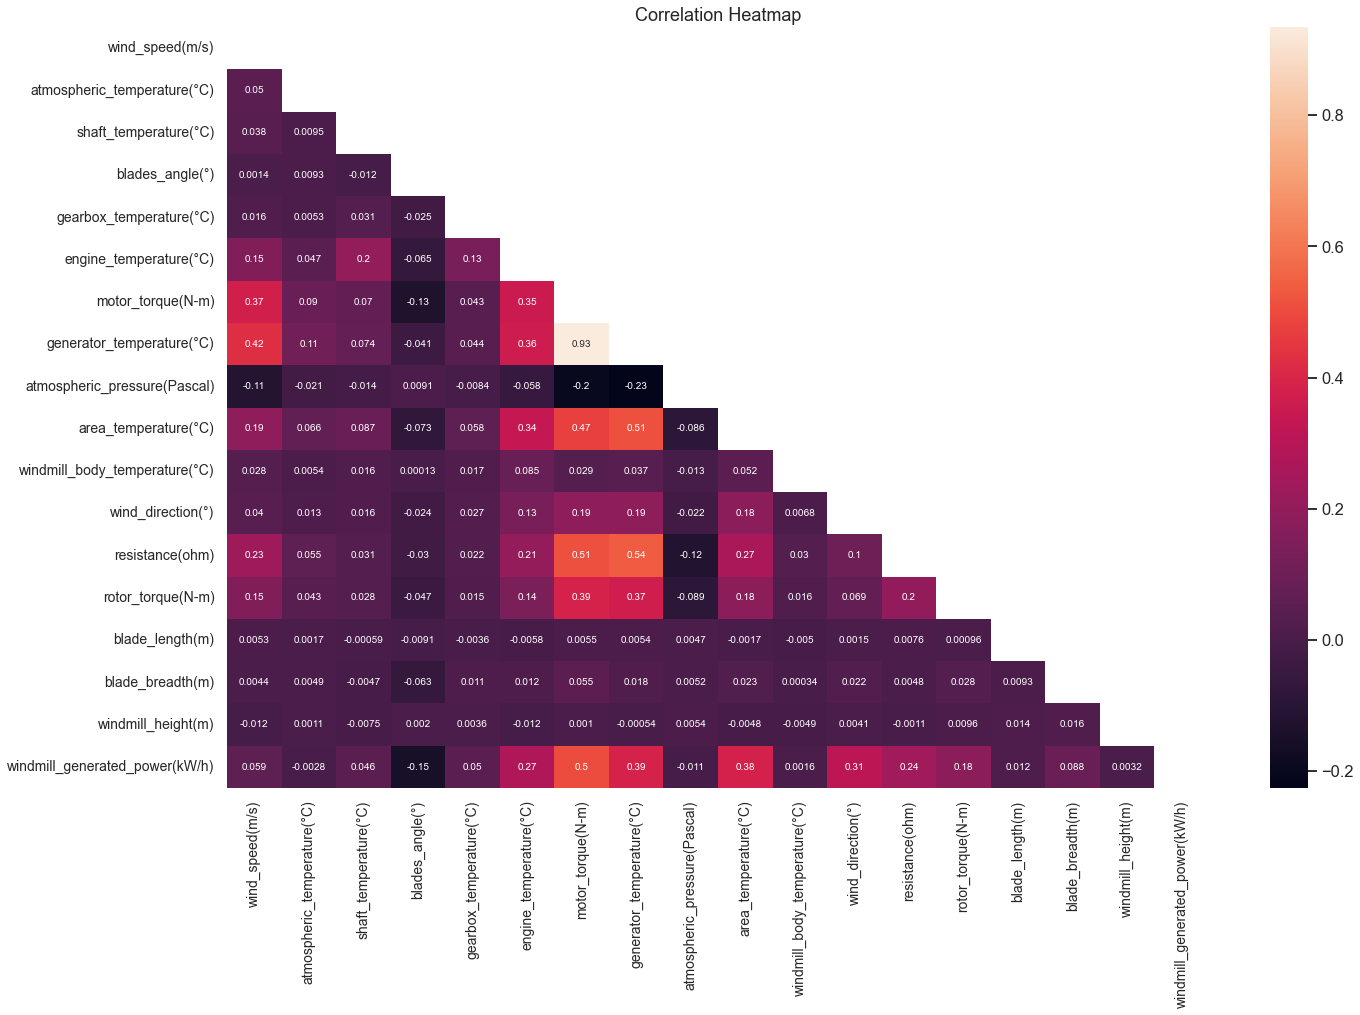

In [591]:
mask = np.zeros_like(data.corr()) # Create a maske for heatmap
triangle_indeces=np.triu_indices_from(mask) # arranging the mask variables in triagular shape
mask[triangle_indeces] =True
mask
plt.figure(figsize=(22,14))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Correlation Heatmap")
plt.show()

In [592]:
def find_n_strong_correlations(df, threshold=0.8, n=5):
    corr_matrix = df.corr().abs() 
    np.fill_diagonal(corr_matrix.values, 0)
    flattened_corr = corr_matrix.unstack().sort_values(ascending=False)
    strong_correlations = []
    i = 0
    while len(strong_correlations) < n and i < len(flattened_corr):
        correlation = flattened_corr[i]
        if correlation >= threshold:
            strong_correlations.append(flattened_corr.index[i])
        i += 1
    
    return strong_correlations
strong_correlations = find_n_strong_correlations(data, threshold=0.8, n=10)
for pair in strong_correlations:
    print(pair)

('motor_torque(N-m)', 'generator_temperature(°C)')
('generator_temperature(°C)', 'motor_torque(N-m)')


## Extracting the target column as the target variable and Removing the target column from the dataframe

In [593]:
#target_column = "windmill_generated_power(kW/h)"
#target = data[target_column]
#data = data.drop(columns=[target_column])

## Checking the Correlation of Features columns with Target column

<AxesSubplot:title={'center':'Correlation of feature columns with windmill_generated_power(kW/h) column'}>

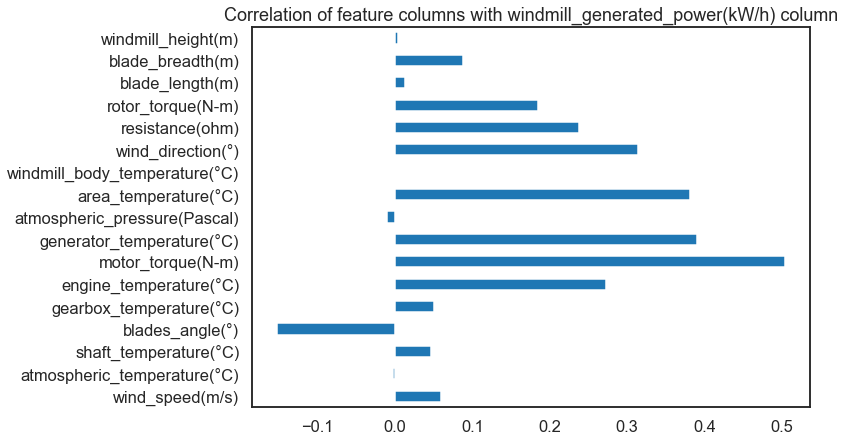

In [594]:
data.drop("windmill_generated_power(kW/h)",axis=1).corrwith(data["windmill_generated_power(kW/h)"]).plot(kind="barh", figsize=(10, 7)
                                                             ,title="Correlation of feature columns with windmill_generated_power(kW/h) column")

## Ploting a histogram for correlation only for features
Here we are again going to create a mask as we created before and then arrange mask into a triangular shape and then create a data frame of correlation with the mask

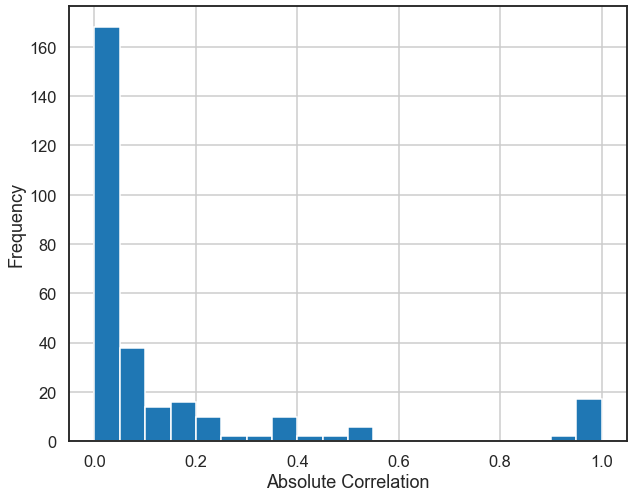

In [595]:
features_cols = data.columns[:-1]
corr_values = data[features_cols ].corr()
tril_index = np.tril_indices_from(corr_values)
corr_array = np.array(corr_values)
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns ,  index = corr_values.index)
corr_values = (corr_values
              .stack()
              .to_frame()
              .reset_index()
              .rename(columns={'level_0':'feature1',
                      'level_1':'feature2',
                      0:'correlation'}))
corr_values['abs_correlation'] = corr_values.correlation.abs()
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins = 20 ,figsize=(10,8))
ax.set(xlabel='Absolute Correlation',ylabel='Frequency');

In [596]:
data

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,windmill_body_temperature(°C),wind_direction(°),resistance(ohm),rotor_torque(N-m),turbine_status,cloud_level,blade_length(m),blade_breadth(m),windmill_height(m),windmill_generated_power(kW/h)
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,20.894347,239.836388,2730.310605,42.084666,BA,Medium,2.217542,0.314065,24.281689,6.766521
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,20.894347,337.944723,1780.207200,107.888643,A2,Medium,4.210346,0.448494,27.262139,5.966275
2,WM_39146,2019-09-14 14:03:20,95.484724,0.458399,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,45.033197,227.850294,1666.049900,-42.931459,ABC,Medium,2.719475,0.302321,27.366127,2.874342
3,WM_21521,2019-05-04 03:13:20,10.722890,0.458399,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,-99.000000,259.274601,1177.516152,13.387289,AAA,Medium,2.213593,0.453374,27.971650,3.519074
4,WM_17873,2019-03-22 21:03:20,93.769973,30.326226,17.970619,-99.000000,43.816430,40.815795,2119.351653,72.345126,...,101.378184,306.997781,1715.244121,97.746463,ABC,Low,2.504098,0.395642,24.673292,4.945780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,44.242269,536.153413,1980.861921,45.909054,BB,Medium,2.774335,0.418299,24.590801,9.587934
26172,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,43.616412,354.239825,1712.840457,36.974913,BB,Low,-3.250989,0.461531,26.051604,4.522195
26173,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,43.576510,534.209913,1951.728713,88.319152,D,Medium,2.213593,0.380264,28.533850,11.096599
26174,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,44.973415,568.504898,1968.917692,47.562627,BCB,Low,3.001855,0.346447,47.747269,9.373239


In [597]:
unique_turbine_status = data['turbine_status'].unique()
unique_turbine_status

array(['BA', 'A2', 'ABC', 'AAA', 'BD', 'AC', 'BB', 'BCB', 'B', 'AB', 'B2',
       'BBB', 'A', 'D'], dtype=object)

In [598]:
unique_cloud_level = data['cloud_level'].unique()
unique_cloud_level

array(['Medium', 'Low', 'Extremely Low'], dtype=object)

## one-hot encoding

In [599]:

columns_to_encode = ['turbine_status', 'cloud_level']


one_hot = OneHotEncoder(handle_unknown='ignore')
one_hot_encoded = one_hot.fit_transform(data[columns_to_encode]).toarray()

column_names = one_hot.get_feature_names_out(columns_to_encode)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=column_names)
data = pd.concat([data, one_hot_encoded_df], axis=1)
data

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,WM_33725,2019-08-04 14:33:20,94.820023,-99.000000,41.723019,-0.903423,82.410573,42.523015,2563.124522,76.665560,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,WM_698,2018-11-05 10:13:20,241.832734,27.764785,-99.000000,-99.000000,44.104919,46.258870,2372.384119,78.129803,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,WM_39146,2019-09-14 14:03:20,95.484724,0.458399,41.855473,12.652763,42.322098,42.878552,1657.169646,67.654469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,WM_21521,2019-05-04 03:13:20,10.722890,0.458399,41.981183,1.715696,-17.616459,43.469852,781.695419,37.423065,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,WM_17873,2019-03-22 21:03:20,93.769973,30.326226,17.970619,-99.000000,43.816430,40.815795,2119.351653,72.345126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26171,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26172,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26173,WM_5193,2018-12-12 02:13:20,94.160463,28.674296,45.004213,9.550358,49.377706,44.042632,2801.657374,94.814637,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
26174,WM_12173,2019-02-03 19:13:20,95.430377,26.560254,48.032624,3.051389,81.443896,44.821365,2760.647280,90.144418,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [600]:
data.dtypes

tracking_id                        object
datetime                           object
wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
turbine_status                     object
cloud_level                        object
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
turbine_status_A                  float64
turbine_status_A2                 

## 

## Outlier detection, visualization and treatment using Z_score method:

FORMULA :<br> 
Column $-$ mean of column  $/$  Standard deviation of column<br>.
_______________________________
If <font color=blur>z_score</font> of columns ><font color=green>3</font>:<br>
then it contains  outliers<br>
if <font color=blur>z_score</font> columns < <font color=green>-3</font> :<br>
then it contains outliers<br>
for perfect Dataset Z_score must be between -3 and 3.


In [601]:
def z_score(df, threshold=1):
    mean, std = np.mean(df), np.std(df)
    z_score = np.abs((df - mean) / std)
    good = z_score < threshold
    print(f"z-score of {threshold} corresponds to a prob of {100 * 2 * norm.sf(3):0.2f}%")
    print(f"Rejection {(~good).sum()} points")
    return good

z-score of 2 corresponds to a prob of 0.27%
Rejection 2237 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 567 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 92 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 30 points


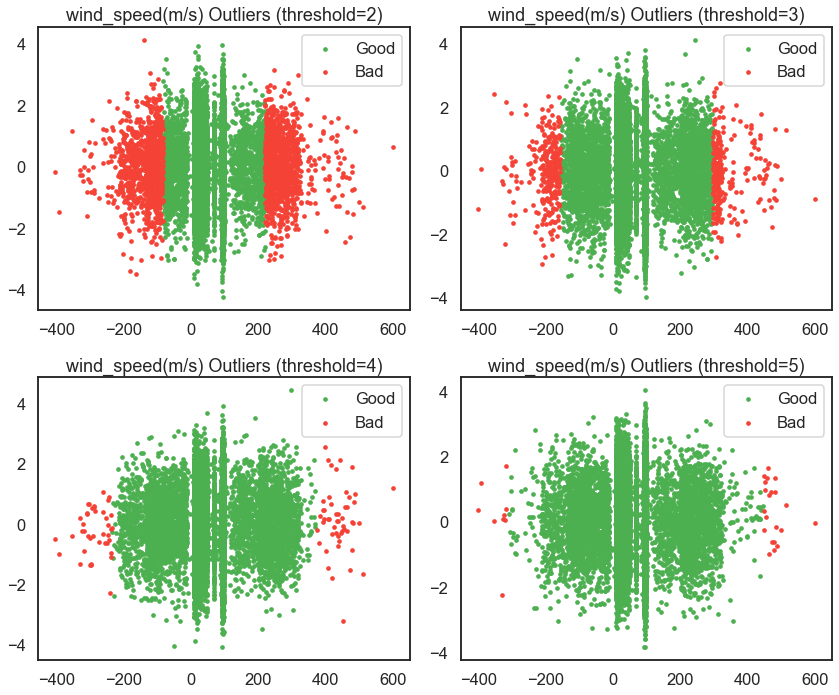

In [602]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['wind_speed(m/s)'], threshold=threshold)
    plt.scatter(data['wind_speed(m/s)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['wind_speed(m/s)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"wind_speed(m/s) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 3653 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


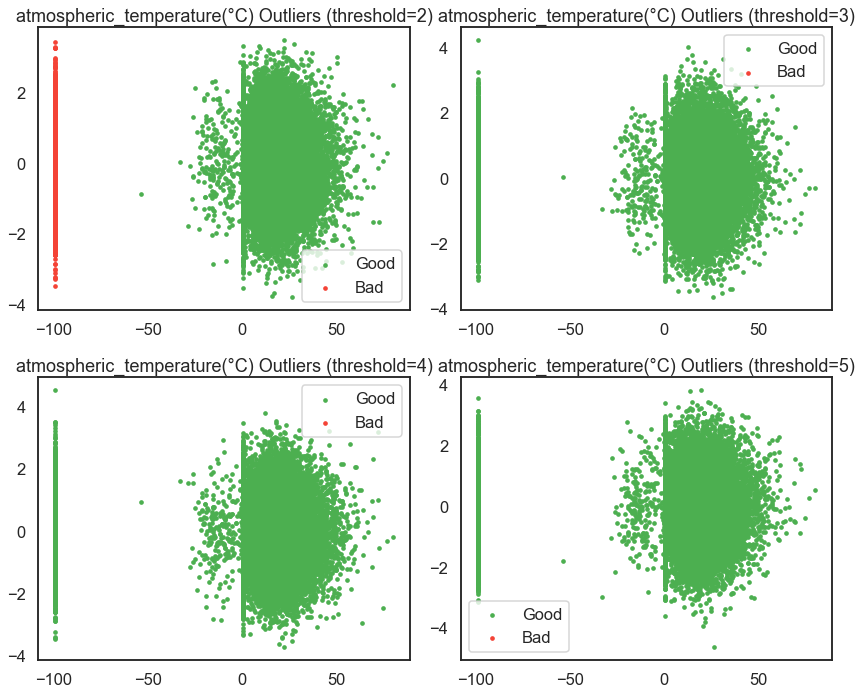

In [603]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['atmospheric_temperature(°C)'], threshold=threshold)
    plt.scatter(data['atmospheric_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['atmospheric_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"atmospheric_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 1090 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 600 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 532 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 522 points


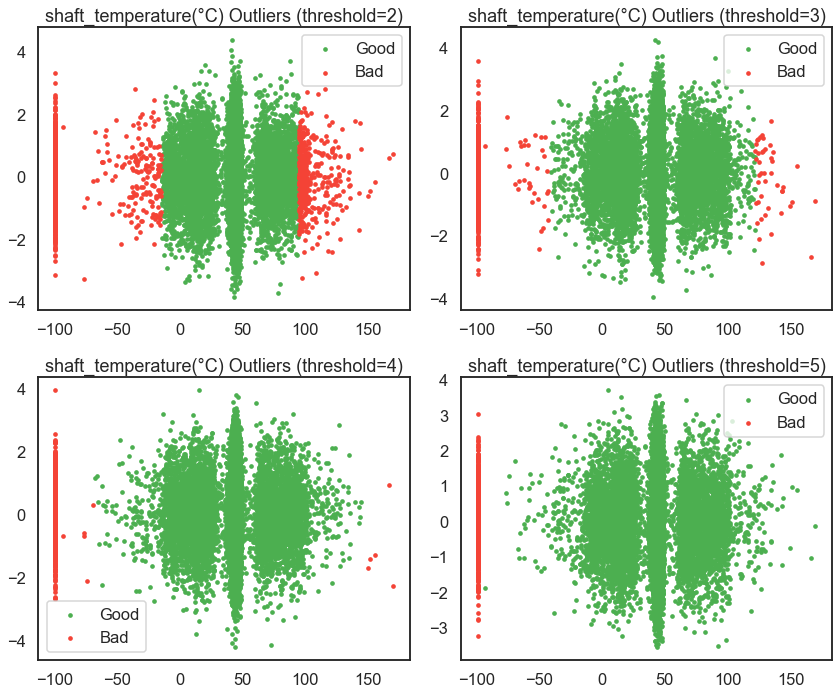

In [604]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['shaft_temperature(°C)'], threshold=threshold)
    plt.scatter(data['shaft_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['shaft_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"shaft_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 670 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 15 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


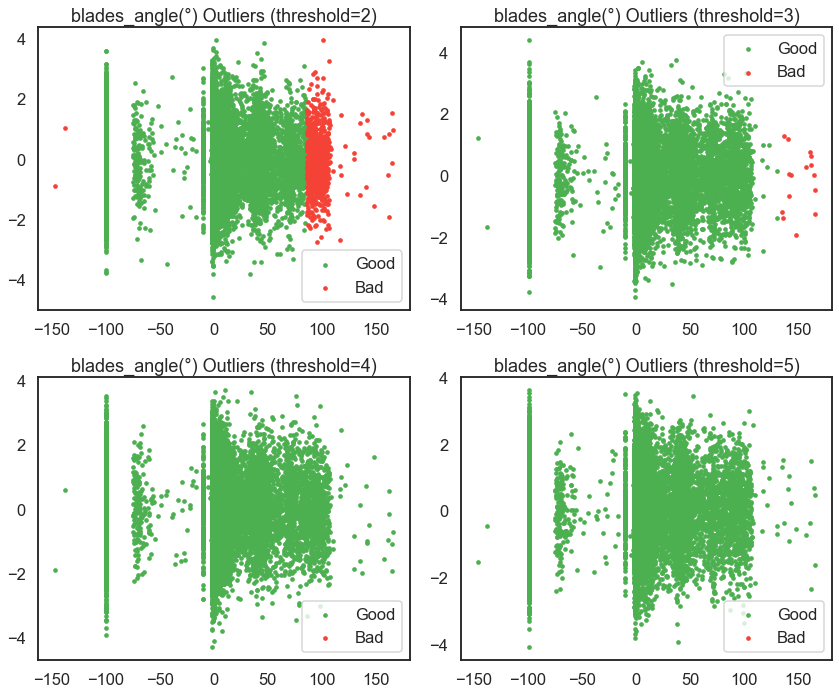

In [605]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['blades_angle(°)'], threshold=threshold)
    plt.scatter(data['blades_angle(°)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['blades_angle(°)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"blades_angle(°) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 2186 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 532 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 92 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 25 points


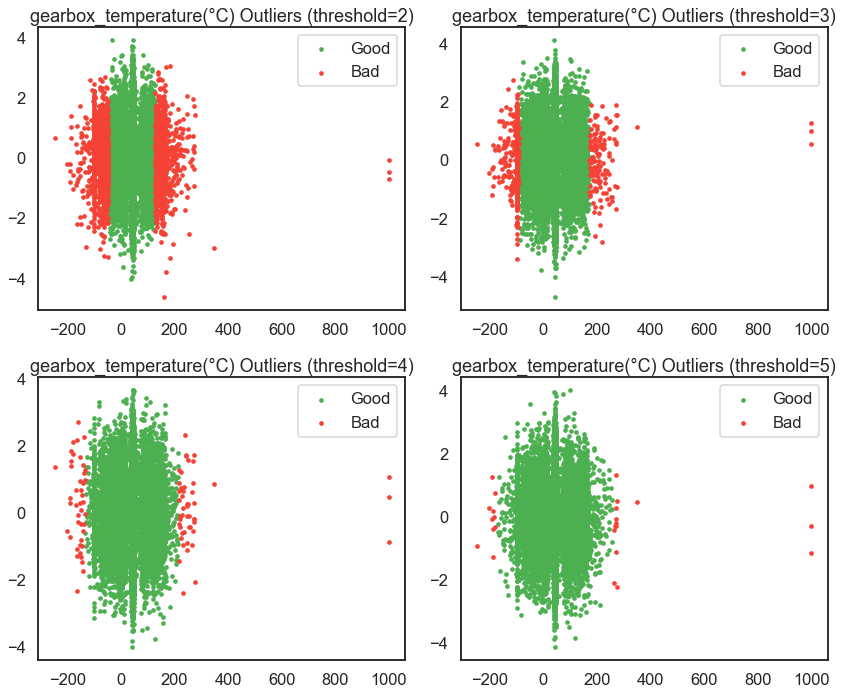

In [606]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['gearbox_temperature(°C)'], threshold=threshold)
    plt.scatter(data['gearbox_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['gearbox_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"gearbox_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 963 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 963 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 906 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 266 points


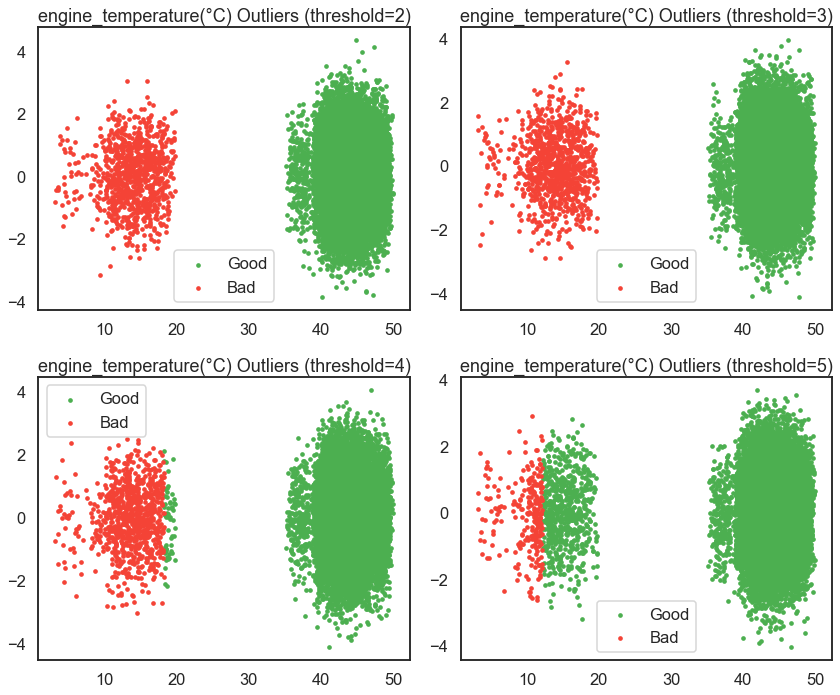

In [607]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['engine_temperature(°C)'], threshold=threshold)
    plt.scatter(data['engine_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['engine_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"engine_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


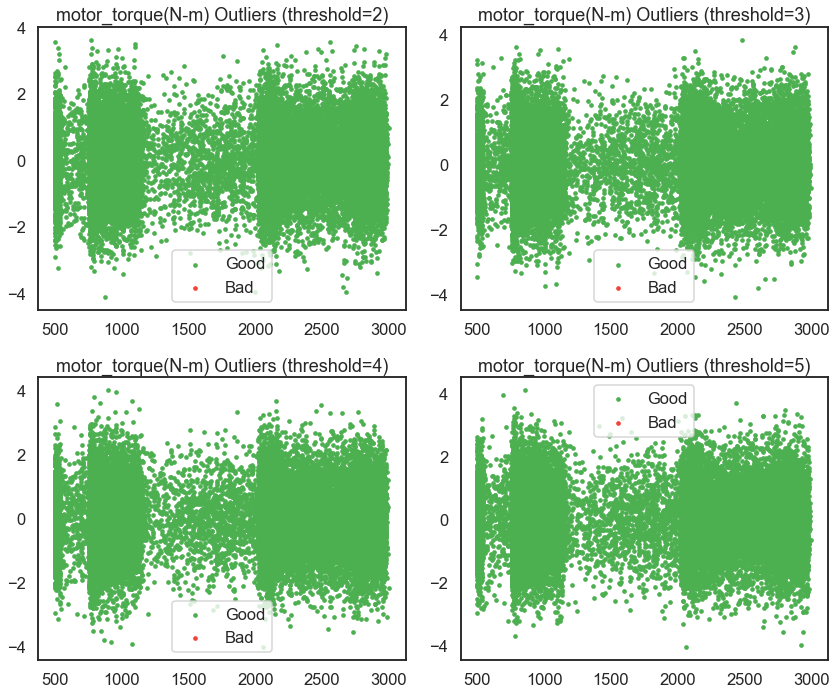

In [608]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['motor_torque(N-m)'], threshold=threshold)
    plt.scatter(data['motor_torque(N-m)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['motor_torque(N-m)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"motor_torque(N-m) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


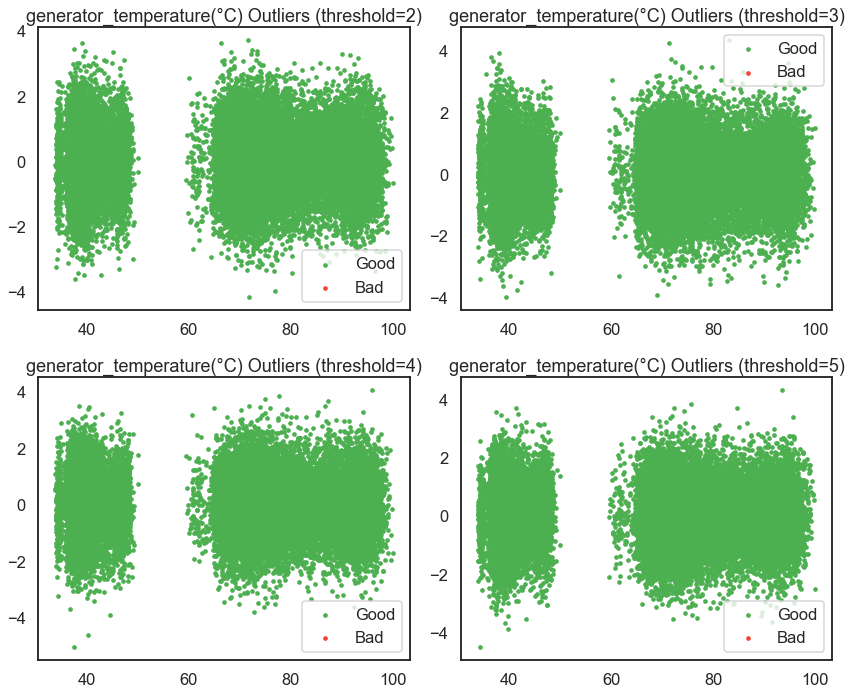

In [609]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['generator_temperature(°C)'], threshold=threshold)
    plt.scatter(data['generator_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['generator_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"generator_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 2209 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 558 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 147 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 46 points


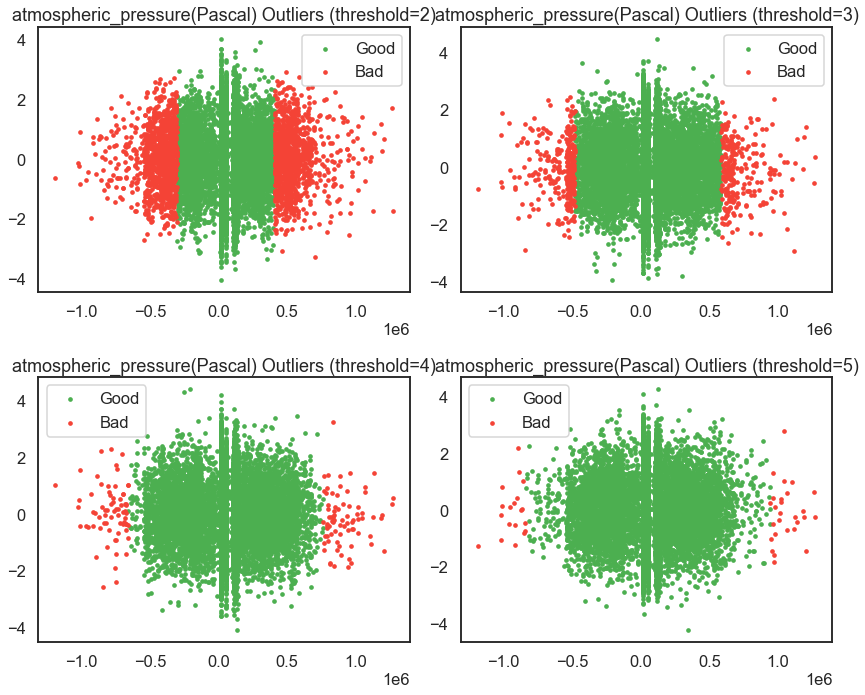

In [610]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['atmospheric_pressure(Pascal)'], threshold=threshold)
    plt.scatter(data['atmospheric_pressure(Pascal)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['atmospheric_pressure(Pascal)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"atmospheric_pressure(Pascal) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 769 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 59 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 43 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 34 points


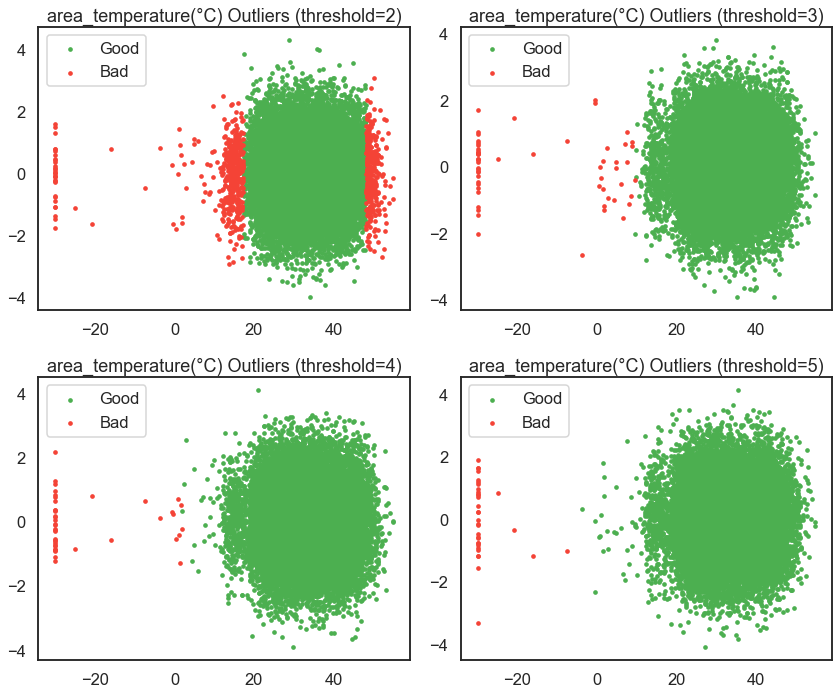

In [611]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['area_temperature(°C)'], threshold=threshold)
    plt.scatter(data['area_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['area_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"area_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 3660 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 4 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 4 points


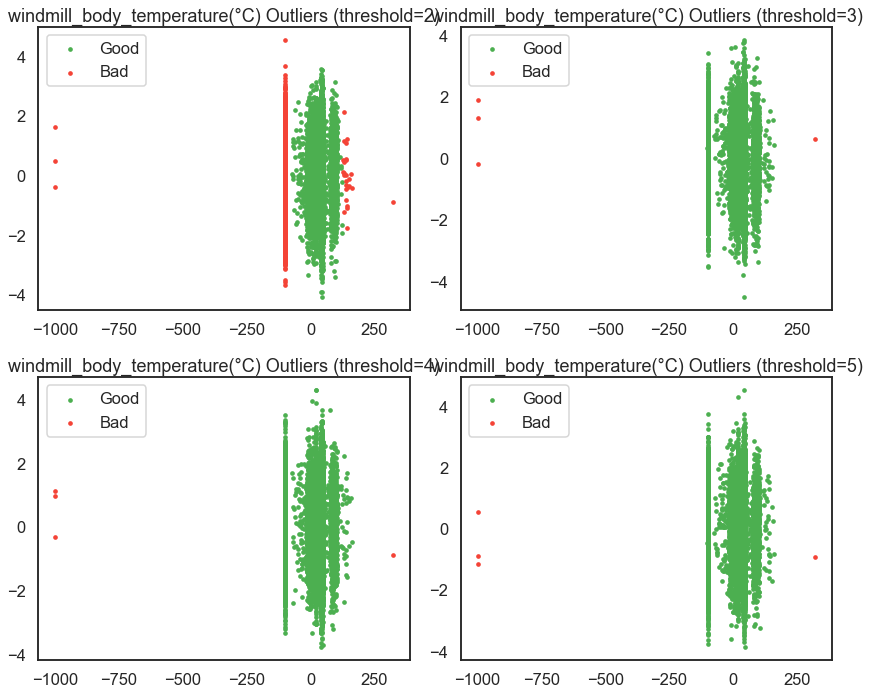

In [612]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['windmill_body_temperature(°C)'], threshold=threshold)
    plt.scatter(data['windmill_body_temperature(°C)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['windmill_body_temperature(°C)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"windmill_body_temperature(°C) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 1429 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


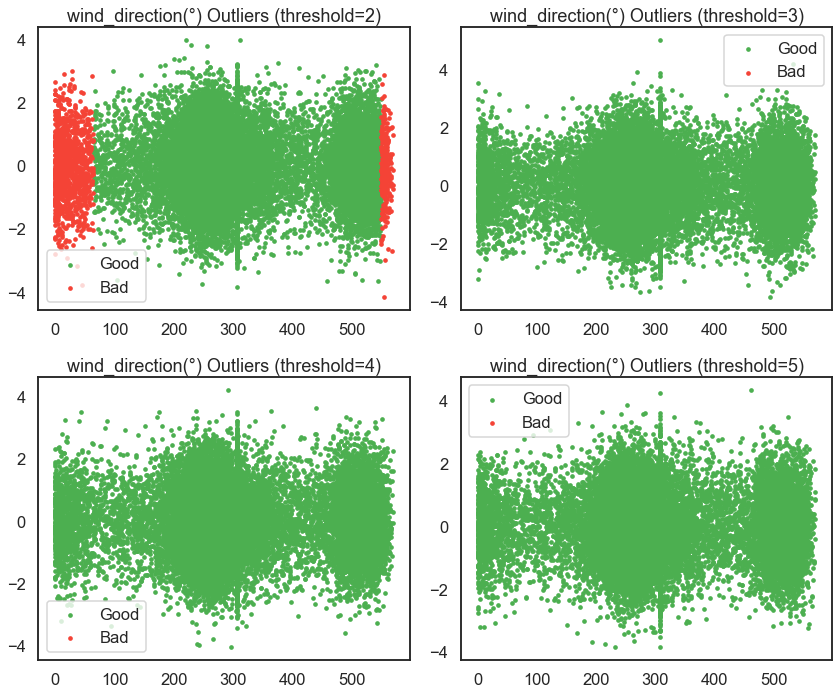

In [613]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['wind_direction(°)'], threshold=threshold)
    plt.scatter(data['wind_direction(°)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['wind_direction(°)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"wind_direction(°) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 1905 points
z-score of 2 corresponds to a prob of 0.27%
Rejection 1905 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 777 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 693 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 40 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 62 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 12 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 7 points


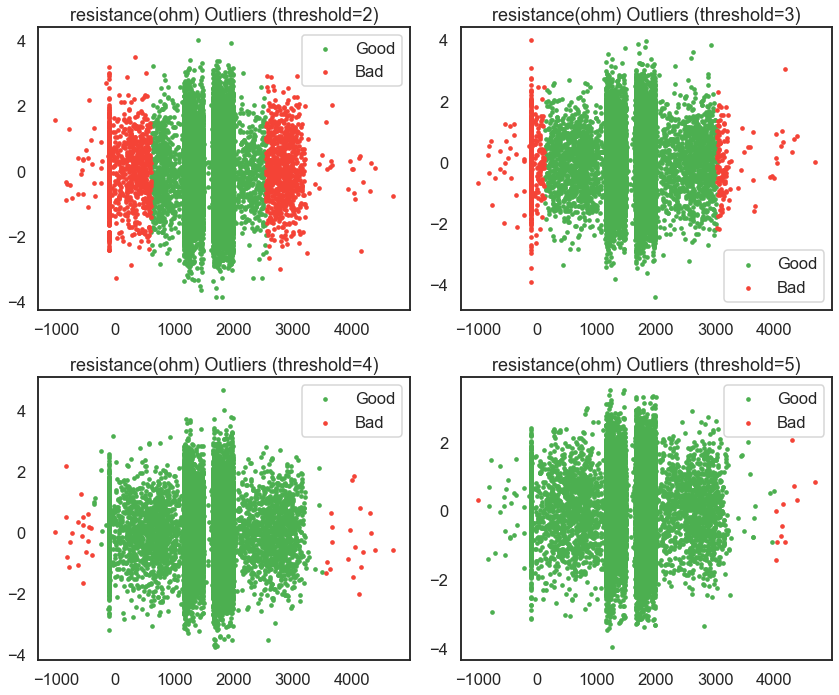

In [614]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['resistance(ohm)'], threshold=threshold)
    good1 = z_score(data['rotor_torque(N-m)'], threshold=threshold)
    plt.scatter(data['resistance(ohm)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['resistance(ohm)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"resistance(ohm) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 1905 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 693 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 62 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 7 points


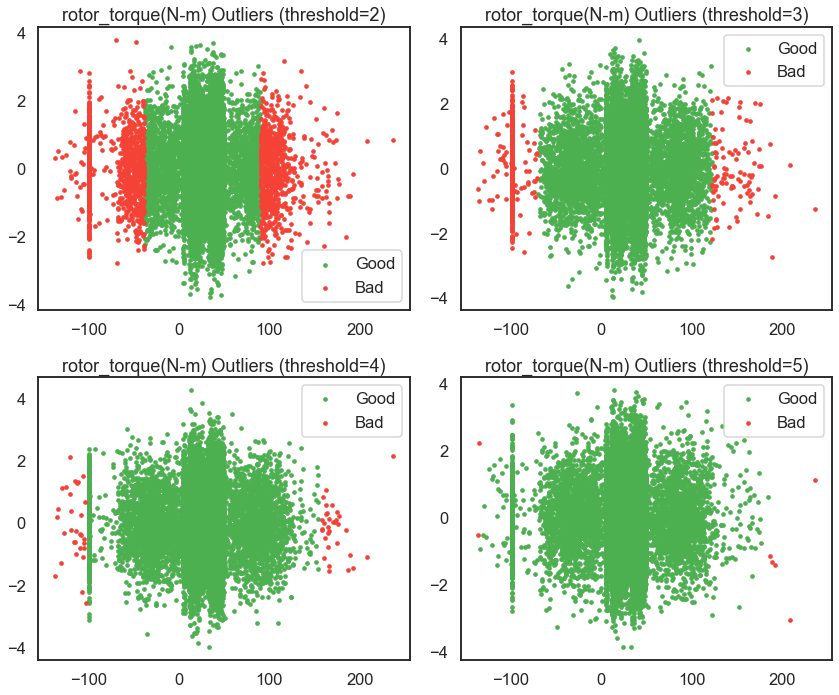

In [615]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['rotor_torque(N-m)'], threshold=threshold)
    plt.scatter(data['rotor_torque(N-m)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['rotor_torque(N-m)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"rotor_torque(N-m) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 264 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 264 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 264 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 264 points


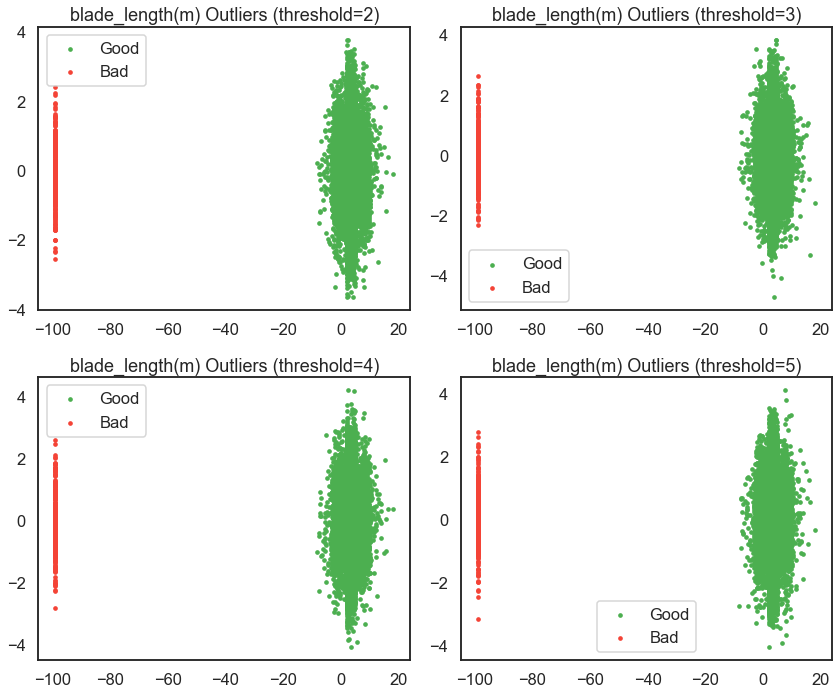

In [616]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['blade_length(m)'], threshold=threshold)
    plt.scatter(data['blade_length(m)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['blade_length(m)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"blade_length(m) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 411 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 66 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


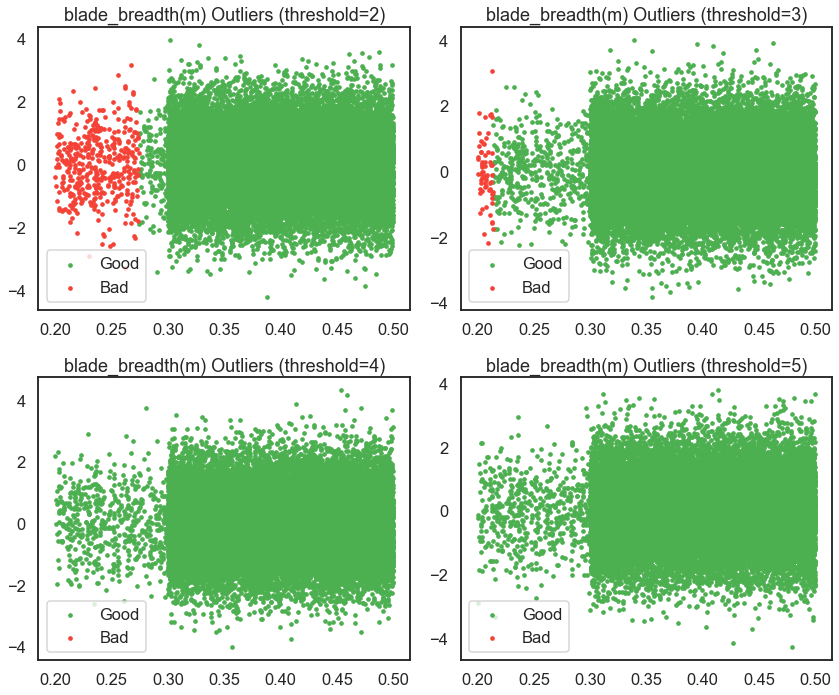

In [617]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['blade_breadth(m)'], threshold=threshold)
    plt.scatter(data['blade_breadth(m)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['blade_breadth(m)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"blade_breadth(m) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 2262 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 433 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 124 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 40 points


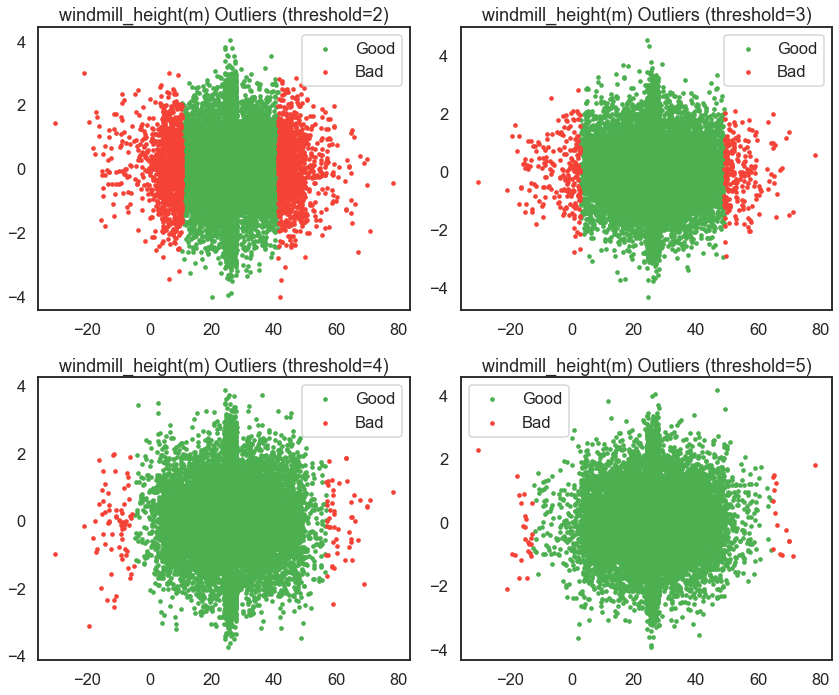

In [618]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['windmill_height(m)'], threshold=threshold)
    plt.scatter(data['windmill_height(m)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['windmill_height(m)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"windmill_height(m) Outliers (threshold={threshold})")

plt.tight_layout()

z-score of 2 corresponds to a prob of 0.27%
Rejection 953 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 196 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 30 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 4 points


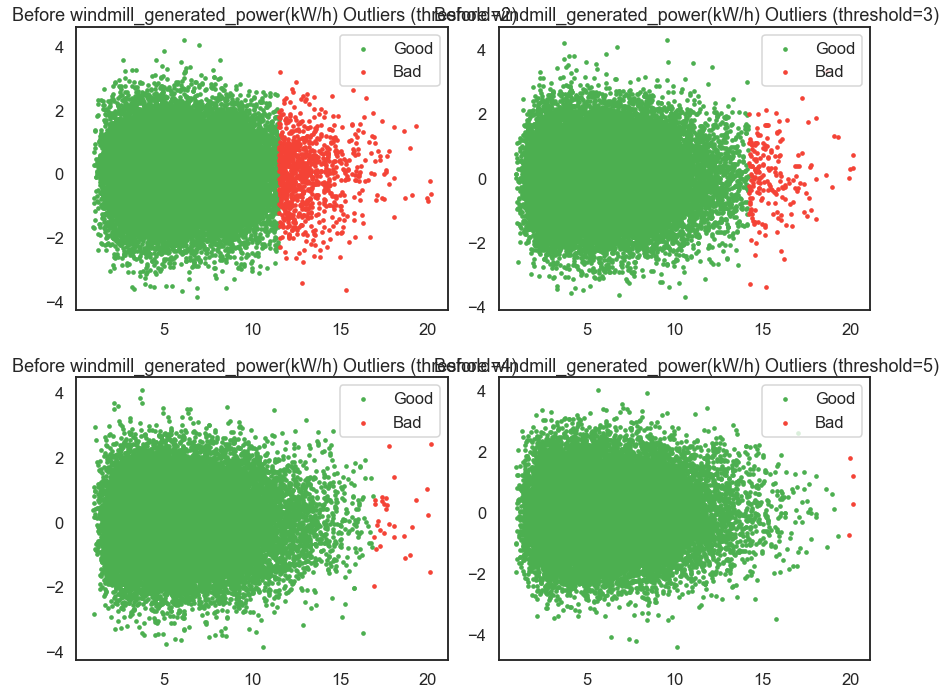

In [619]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['windmill_generated_power(kW/h)'], threshold=threshold)
    plt.scatter(data['windmill_generated_power(kW/h)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['windmill_generated_power(kW/h)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f" Before windmill_generated_power(kW/h) Outliers (threshold={threshold})")

plt.tight_layout()

In [620]:
def remove_outliers(df, threshold=3):
    df_cleaned = df.copy()
    for column in df_cleaned.columns:
        if df_cleaned[column].dtype != 'object':
            z_scores = np.abs((df_cleaned[column] - df_cleaned[column].mean()) / df_cleaned[column].std())
            outliers = z_scores > threshold
            df_cleaned = df_cleaned[~outliers]
    df_cleaned.reset_index(drop=True, inplace=True)
    return df_cleaned

In [621]:
data = remove_outliers(data, threshold=2)
data

,tracking_id,datetime,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,WM_24405,2019-05-24 12:23:20,91.996173,0.458399,41.873082,69.484459,-12.381636,43.133390,1146.924155,69.357935,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,WM_2506,2018-11-22 08:23:20,92.774351,15.843846,44.225367,-0.600865,40.707475,44.957724,2052.849171,74.760065,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,WM_29855,2019-07-05 10:03:20,11.596508,10.164266,-6.382525,1.284840,43.018856,39.696158,766.316211,37.527239,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,WM_33312,2019-08-01 16:13:20,95.868798,15.767437,43.277538,83.244474,92.468507,40.484792,1009.567101,66.272236,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,WM_29287,2019-07-01 09:13:20,91.259640,16.422512,22.520612,2.897473,91.578423,42.960251,2137.232304,68.468688,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,WM_20610,2019-04-27 01:03:20,20.177101,7.007639,43.902664,-99.000000,43.221307,45.315933,845.397561,40.166194,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2636,WM_21441,2019-05-02 21:53:20,13.096694,9.936019,42.093047,72.513494,39.913540,43.276769,757.161483,38.284383,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2637,WM_7814,2019-01-02 02:43:20,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2638,WM_32512,2019-07-26 12:53:20,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


z-score of 2 corresponds to a prob of 0.27%
Rejection 261 points
z-score of 3 corresponds to a prob of 0.27%
Rejection 38 points
z-score of 4 corresponds to a prob of 0.27%
Rejection 0 points
z-score of 5 corresponds to a prob of 0.27%
Rejection 0 points


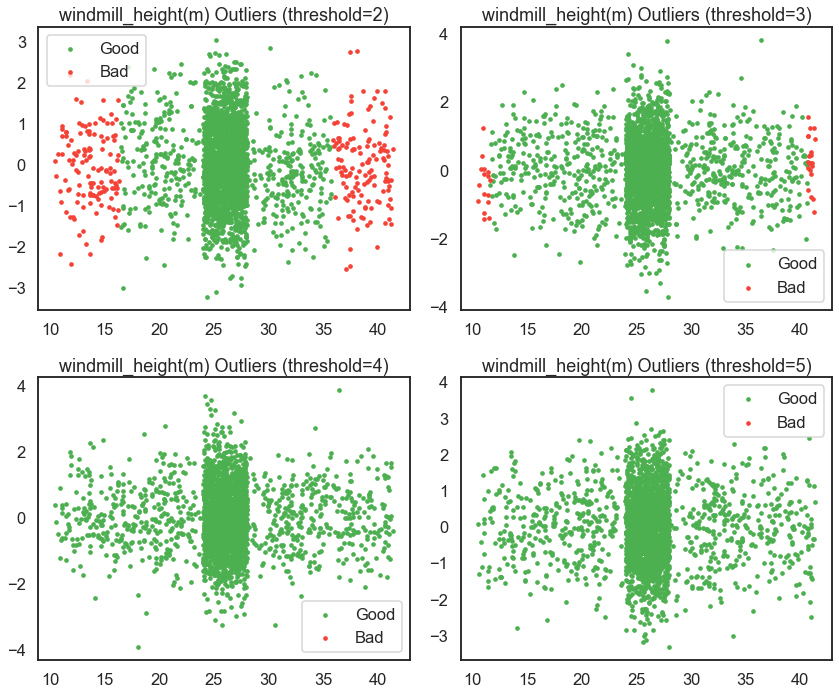

In [622]:
plt.figure(figsize=(12, 10))

for i, threshold in zip(range(1, 5), range(2, 6)):
    plt.subplot(2, 2, i)
    visual_scatter = np.random.normal(size=data.shape[0])
    good = z_score(data['windmill_height(m)'], threshold=threshold)
    plt.scatter(data['windmill_height(m)'][good], visual_scatter[good], s=10, label="Good", color="#4CAF50")
    plt.scatter(data['windmill_height(m)'][~good], visual_scatter[~good], s=10, label="Bad", color="#F44336")
    plt.legend()
    plt.title(f"windmill_height(m) Outliers (threshold={threshold})")

plt.tight_layout()

In [623]:
def drop_non_float_columns(df):
    non_float_columns = df.select_dtypes(exclude=['float64']).columns
    df = df.drop(columns=non_float_columns)
    return df
new_data = drop_non_float_columns(data)
new_data

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,91.996173,0.458399,41.873082,69.484459,-12.381636,43.133390,1146.924155,69.357935,16453.592349,23.151475,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,92.774351,15.843846,44.225367,-0.600865,40.707475,44.957724,2052.849171,74.760065,16807.827125,38.967068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,11.596508,10.164266,-6.382525,1.284840,43.018856,39.696158,766.316211,37.527239,112061.258548,22.951950,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,95.868798,15.767437,43.277538,83.244474,92.468507,40.484792,1009.567101,66.272236,52577.837738,29.738340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,91.259640,16.422512,22.520612,2.897473,91.578423,42.960251,2137.232304,68.468688,16874.919914,22.926848,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,20.177101,7.007639,43.902664,-99.000000,43.221307,45.315933,845.397561,40.166194,120708.874550,31.261068,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2636,13.096694,9.936019,42.093047,72.513494,39.913540,43.276769,757.161483,38.284383,116089.702631,37.785179,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2637,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2638,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [624]:
new_data.dtypes

wind_speed(m/s)                   float64
atmospheric_temperature(°C)       float64
shaft_temperature(°C)             float64
blades_angle(°)                   float64
gearbox_temperature(°C)           float64
engine_temperature(°C)            float64
motor_torque(N-m)                 float64
generator_temperature(°C)         float64
atmospheric_pressure(Pascal)      float64
area_temperature(°C)              float64
windmill_body_temperature(°C)     float64
wind_direction(°)                 float64
resistance(ohm)                   float64
rotor_torque(N-m)                 float64
blade_length(m)                   float64
blade_breadth(m)                  float64
windmill_height(m)                float64
windmill_generated_power(kW/h)    float64
turbine_status_A                  float64
turbine_status_A2                 float64
turbine_status_AAA                float64
turbine_status_AB                 float64
turbine_status_ABC                float64
turbine_status_AC                 

## Feature scaling: 

In [625]:
X=new_data.drop("windmill_generated_power(kW/h)",axis=1).values
y=new_data["windmill_generated_power(kW/h)"].values

In [626]:
# Performing feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_data)

# Split the data into train, test, and validation sets
X_train_val, X_test, y_train_val, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [627]:

num_cols = X.shape[1]
target_cols = int(np.ceil(np.sqrt(num_cols))) ** 2

X_padded = np.pad(X, ((0, 0), (0, target_cols - num_cols)), 'constant')

# Reshaping the padded data into a square grid
X_cnn = X_padded.reshape(-1, int(np.sqrt(target_cols)), int(np.sqrt(target_cols)), 1)

# Reshaping the input data into a 3D array (samples, timesteps, features)
X_LSTM = np.reshape(X, (X.shape[0], 1, X.shape[1]))

In [628]:
new_data

,wind_speed(m/s),atmospheric_temperature(°C),shaft_temperature(°C),blades_angle(°),gearbox_temperature(°C),engine_temperature(°C),motor_torque(N-m),generator_temperature(°C),atmospheric_pressure(Pascal),area_temperature(°C),...,turbine_status_B2,turbine_status_BA,turbine_status_BB,turbine_status_BBB,turbine_status_BCB,turbine_status_BD,turbine_status_D,cloud_level_Extremely Low,cloud_level_Low,cloud_level_Medium
0,91.996173,0.458399,41.873082,69.484459,-12.381636,43.133390,1146.924155,69.357935,16453.592349,23.151475,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,92.774351,15.843846,44.225367,-0.600865,40.707475,44.957724,2052.849171,74.760065,16807.827125,38.967068,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,11.596508,10.164266,-6.382525,1.284840,43.018856,39.696158,766.316211,37.527239,112061.258548,22.951950,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,95.868798,15.767437,43.277538,83.244474,92.468507,40.484792,1009.567101,66.272236,52577.837738,29.738340,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,91.259640,16.422512,22.520612,2.897473,91.578423,42.960251,2137.232304,68.468688,16874.919914,22.926848,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,20.177101,7.007639,43.902664,-99.000000,43.221307,45.315933,845.397561,40.166194,120708.874550,31.261068,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2636,13.096694,9.936019,42.093047,72.513494,39.913540,43.276769,757.161483,38.284383,116089.702631,37.785179,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2637,94.765699,23.576793,45.399352,5.377222,-1.085171,48.528248,2791.600990,90.898875,19428.725079,45.429230,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2638,94.196738,24.034329,42.068979,-99.000000,44.285153,43.487939,2207.882276,72.244645,16596.485400,25.142681,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Optional Goal: What effect do the physical measurements of a windmill have on the power generated?

In [629]:
from sklearn.linear_model import LinearRegression

features = ['wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)', 'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)', 'atmospheric_pressure(Pascal)', 'area_temperature(°C)']
target = 'windmill_generated_power(kW/h)'

X = new_data[features]
y = new_data[target]


model = LinearRegression()

model.fit(X, y)

coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coefficients)

                        Feature  Coefficient
0               wind_speed(m/s)    -0.003562
1   atmospheric_temperature(°C)    -0.031599
2         shaft_temperature(°C)     0.000379
3               blades_angle(°)    -0.001076
4       gearbox_temperature(°C)     0.001864
5        engine_temperature(°C)     0.408197
6             motor_torque(N-m)     0.002777
7     generator_temperature(°C)    -0.075824
8  atmospheric_pressure(Pascal)     0.000002
9          area_temperature(°C)     0.073649


## Optional Goal: What effect do the atmospheric and weather conditions have on the power generated?

In [630]:
import statsmodels.api as sm

features = ['wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)',
            'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)',
            'atmospheric_pressure(Pascal)', 'area_temperature(°C)', 'cloud_level_Extremely Low', 'cloud_level_Low',
            'cloud_level_Medium']

target = 'windmill_generated_power(kW/h)' 

X = data[features]
X = pd.get_dummies(X)

X = sm.add_constant(X)

y = data[target]

model = sm.OLS(y, X)
results = model.fit()

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': results.params})
print(coefficients)

print(results.summary())

                                                   Feature   Coefficient
const                                                const -9.054105e+00
wind_speed(m/s)                            wind_speed(m/s) -3.520191e-03
atmospheric_temperature(°C)    atmospheric_temperature(°C) -3.159962e-02
shaft_temperature(°C)                shaft_temperature(°C)  3.961819e-04
blades_angle(°)                            blades_angle(°) -1.119107e-03
gearbox_temperature(°C)            gearbox_temperature(°C)  1.837513e-03
engine_temperature(°C)              engine_temperature(°C)  4.080711e-01
motor_torque(N-m)                        motor_torque(N-m)  2.779906e-03
generator_temperature(°C)        generator_temperature(°C) -7.596400e-02
atmospheric_pressure(Pascal)  atmospheric_pressure(Pascal)  1.897657e-06
area_temperature(°C)                  area_temperature(°C)  7.362092e-02
cloud_level_Extremely Low        cloud_level_Extremely Low  8.294385e-18
cloud_level_Low                            cloud_le

## Optional Goal: What are the most important factors that impact power generated?

In [631]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X, y)

feature_importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

                         Feature  Importance
7              motor_torque(N-m)    0.584749
4                blades_angle(°)    0.217675
9   atmospheric_pressure(Pascal)    0.093993
8      generator_temperature(°C)    0.036826
1                wind_speed(m/s)    0.023885
6         engine_temperature(°C)    0.017867
5        gearbox_temperature(°C)    0.008278
2    atmospheric_temperature(°C)    0.006232
3          shaft_temperature(°C)    0.005083
10          area_temperature(°C)    0.004508
12               cloud_level_Low    0.000473
13            cloud_level_Medium    0.000431
0                          const    0.000000
11     cloud_level_Extremely Low    0.000000


# Model training

## 1. Support Vector Regression (SVR)

In [632]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

def train_evaluate_svr(X_train, y_train, X_test, y_test, X_val, y_val ):
    
    svr = SVR()
    start = timer()
    svr.fit(X_train, y_train)
    end = timer()
    print('Training duration',end - start," seconds")
    
    y_pred = svr.predict(X_val)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    
    train_sizes = np.linspace(0.1, 1.0, 10)

    
    train_sizes, train_scores, test_scores = learning_curve(svr, X_train, y_train, train_sizes=train_sizes, cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()



Training duration 0.09881080000195652  seconds
Mean Squared Error: 8.845889866126171
Mean Absolute Error: 2.3957781554895616
R-squared: -0.6422184664060515


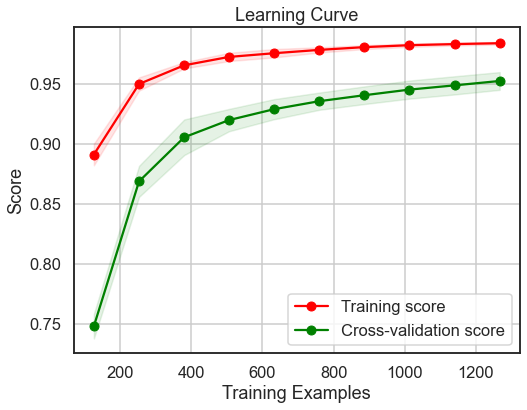

In [633]:
train_evaluate_svr(X_train, y_train, X_test, y_test, X_val, y_val)

## HyperParameter Tuning to find the best hyperparameters

In [634]:
def plot_learning_curveSVR(estimator, X, y):
    
    train_sizes = np.linspace(0.1, 1.0, 10)

    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plotting learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.title('Learning Curve')
    plt.grid(True)
    plt.show()

In [635]:
def hyperparameter_tuning_svr(X_train, y_train, X_test, y_test, X_val, y_val):
    param_grid = {
        'C': [0.1, 1.0, 10.0],
        'epsilon': [0.1, 0.01, 0.001],
        'kernel': ['linear', 'rbf']
    }


    svr = SVR()
    grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)
    svr_best = grid_search.best_estimator_
    start = timer()
    svr_best.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')
    y_pred = svr_best.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print('Mean Squared Error:', mse)
    print('Mean Absolute Error:', mae)
    print('R-squared:', r2)

    # Plotting the learning curve for the best model
    plot_learning_curveSVR(svr_best, X_train, y_train)

    return svr_best

Training duration: 0.1261923999991268 seconds
Mean Squared Error: 2.367184972997637e-07
Mean Absolute Error: 0.00039079294061952134
R-squared: 0.9999999545727293


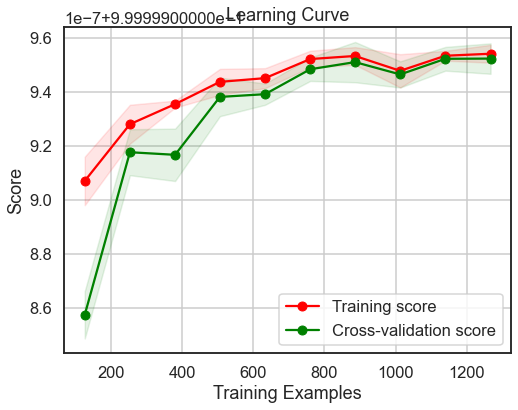

SVR(epsilon=0.001, kernel='linear')

In [636]:
hyperparameter_tuning_svr(X_train, y_train, X_test, y_test, X_val, y_val)

## 2. Random forest(RF)

In [637]:
from sklearn.ensemble import RandomForestRegressor

def train_evaluate_rf(X_train, y_train, X_test, y_test, X_val, y_val):
    
    rf = RandomForestRegressor()
    start = timer()
    rf.fit(X_train, y_train)
    end = timer()
    print('Training duration',end - start," seconds")
    
    y_pred = rf.predict(X_val)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    
    train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

Training duration 1.1094647000427358  seconds
Mean Squared Error: 9.543300927693846
Mean Absolute Error: 2.4789075477804494
R-squared: -0.7716911753494466


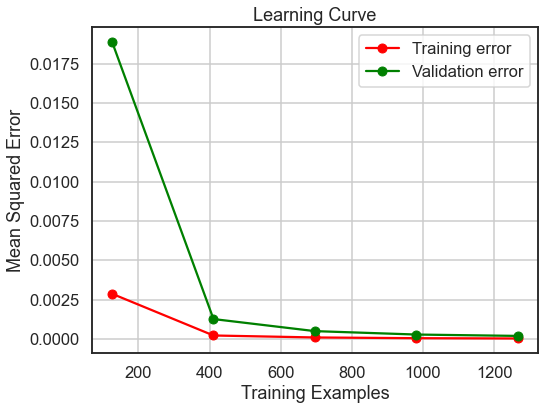

In [638]:
train_evaluate_rf(X_train, y_train, X_test, y_test, X_val, y_val)

In [639]:
def plot_learning_curveRF(estimator, X, y):
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='neg_mean_squared_error')
    train_scores_mean = -np.mean(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Training Examples')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

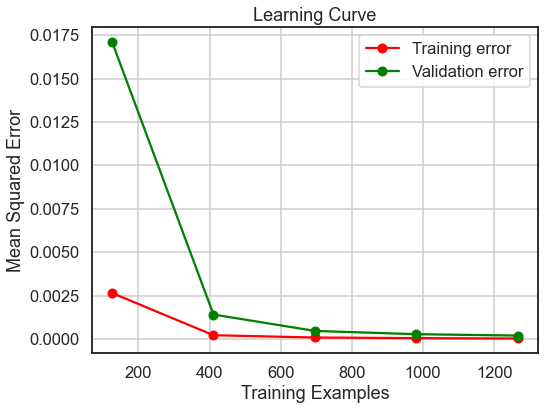

In [640]:
estimator = RandomForestRegressor()
plot_learning_curveRF(estimator, X_train, y_train)

## HyperParameter Tuning to find the best hyperparameters

In [645]:
def hyperparameter_tuning_rf(X_train, y_train):
   
    rf = RandomForestRegressor()

    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)
    rf_best = grid_search.best_estimator_

    return rf_best

def train_evaluate_tuned_rf(X_train, y_train, X_test, y_test, X_val, y_val):
    rf_best = hyperparameter_tuning_rf(X_train, y_train)
    rf_best.fit(X_train, y_train)
    y_pred = rf_best.predict(X_val)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    plot_learning_curveRF(rf_best, X_train, y_train)

Mean Squared Error: 9.54386257338875
Mean Absolute Error: 2.4790569968879956
R-squared: -0.7717954435401781


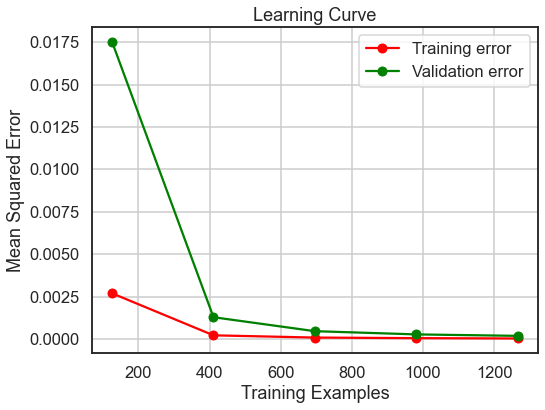

In [646]:
train_evaluate_tuned_rf(X_train, y_train, X_test, y_test, X_val, y_val)

## 3. Gradient Boosting Regressor

In [647]:
from sklearn.ensemble import GradientBoostingRegressor
def plot_learning_curvegb(estimator, X, y, title):
    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()


def train_evaluate_gb(X_train, y_train, X_test, y_test, X_val, y_val):
    gb = GradientBoostingRegressor()
    start = timer()
    gb.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')
    y_pred = gb.predict(X_val)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}') 
    plot_learning_curvegb(gb, X_train, y_train, 'Learning Curve')

Training duration: 0.584108599985484 seconds
Mean Squared Error: 9.539549088221154
Mean Absolute Error: 2.478503429724454
R-squared: -0.7709946552527362


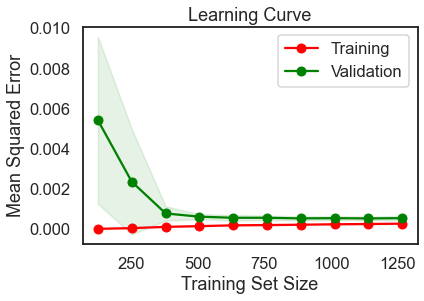

In [648]:
train_evaluate_gb(X_train, y_train, X_test, y_test, X_val, y_val)

## HyperParameter Tuning to find the best hyperparameters

In [649]:
def tune_hyperparameters_gb(X_train, y_train, X_test, y_test, X_val, y_val):
    
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7]
    }

    
    gb = GradientBoostingRegressor()
    grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

   
    best_params = grid_search.best_params_
    print('Best Hyperparameters:', best_params)

    
    gb_best = GradientBoostingRegressor(**best_params)
    start = timer()
    gb_best.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')

    
    y_pred = gb_best.predict(X_val)

    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')

   
    plot_learning_curvegb(gb_best, X_train, y_train, 'Learning Curve')

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Training duration: 1.870679099985864 seconds
Mean Squared Error: 9.540775535488368
Mean Absolute Error: 2.4790151505806337
R-squared: -0.7712223422780975


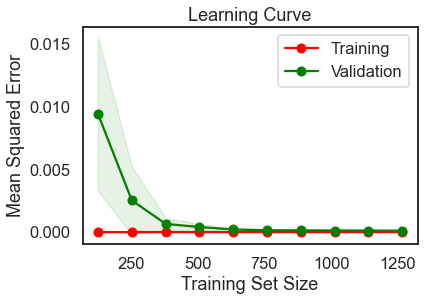

In [650]:
tune_hyperparameters_gb(X_train, y_train, X_test, y_test, X_val, y_val)

## 4. Multi-layer perceptron

In [651]:
from sklearn.neural_network import MLPRegressor

def train_evaluate_mlp(X_train, y_train, X_test, y_test, X_val, y_val):
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    from timeit import default_timer as timer

    
    mlp = MLPRegressor(max_iter=1000)
    start = timer()
    mlp.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')

    
    y_pred = mlp.predict(X_val)

    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

   
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')

    
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    val_errors = []
    
    for train_size in train_sizes:
        
        subset_size = int(train_size * len(X_train))
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]
        
        
        mlp.fit(X_subset, y_subset)
        
        
        y_train_pred = mlp.predict(X_subset)
        train_error = mean_squared_error(y_subset, y_train_pred)
        train_errors.append(train_error)
        
        y_val_pred = mlp.predict(X_val)
        val_error = mean_squared_error(y_val, y_val_pred)
        val_errors.append(val_error)

    
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, val_errors, label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

Training duration: 1.1173135000281036 seconds
Mean Squared Error: 9.374206993444476
Mean Absolute Error: 2.462795698525242
R-squared: -0.7402992876384173


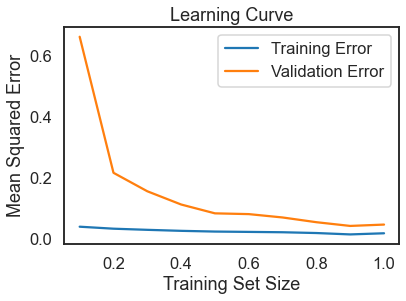

In [652]:
train_evaluate_mlp(X_train, y_train, X_test, y_test, X_val, y_val)

## HyperParameter Tuning to find the best hyperparameters

In [653]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

def tune_hyperparameters_mlp(X_train, y_train, X_test, y_test, X_val, y_val):
   
    param_grid = {
        'hidden_layer_sizes': [(10,), (50,), (100,)],
        'activation': ['relu', 'tanh'],
        'alpha': [0.0001, 0.001, 0.01]
    }

    mlp = MLPRegressor(max_iter=1000)
    grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    print('Best Hyperparameters:', best_params)

    mlp_best = MLPRegressor(max_iter=1000, **best_params)
    start = timer()
    mlp_best.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')
    y_pred = mlp_best.predict(X_val)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')

    test_scores = grid_search.cv_results_['mean_test_score']
    hidden_layer_sizes = [params['hidden_layer_sizes'][0] for params in grid_search.cv_results_['params']]
    error_rates = [-score for score in test_scores]

    plt.plot(hidden_layer_sizes, error_rates, 'o-')
    plt.xlabel('Hidden Layer Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.show()

    train_sizes = np.linspace(0.1, 1.0, 10)
    train_errors = []
    val_errors = []

    for train_size in train_sizes:
        subset_size = int(train_size * len(X_train))
        X_subset = X_train[:subset_size]
        y_subset = y_train[:subset_size]

        
        mlp_best.fit(X_subset, y_subset)

        
        y_train_pred = mlp_best.predict(X_subset)
        train_error = mean_squared_error(y_subset, y_train_pred)
        train_errors.append(train_error)

        
        y_val_pred = mlp_best.predict(X_val)
        val_error = mean_squared_error(y_val, y_val_pred)
        val_errors.append(val_error)

    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, val_errors, label='Validation Error')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

Best Hyperparameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,)}
Training duration: 0.6744732999941334 seconds
Mean Squared Error: 9.55581780381684
Mean Absolute Error: 2.4861998565775547
R-squared: -0.7740149037048734


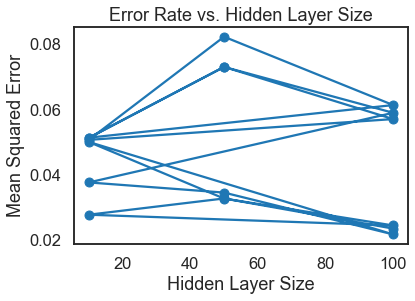

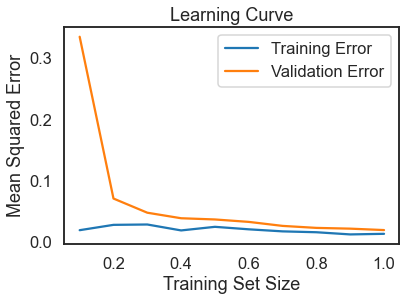

In [654]:
tune_hyperparameters_mlp(X_train, y_train, X_test, y_test, X_val, y_val)

## 5. XGBoost (Extreme Gradient Boosting)

In [ ]:
!pip install xgboost

In [655]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def plot_learning_curvexgb(estimator, X, y, title):
    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error')

    
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = -np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

def train_evaluate_xgb(X_train, y_train, X_test, y_test, X_val, y_val):
   
    xgb_model = xgb.XGBRegressor()
    start = timer()
    xgb_model.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')

    
    y_pred = xgb_model.predict(X_val)

    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')

    plot_learning_curvexgb(xgb_model, X_train, y_train, 'Learning Curve')


Training duration: 0.13542330003110692 seconds
Mean Squared Error: 9.53183152432807
Mean Absolute Error: 2.478272589586255
R-squared: -0.769561907826225


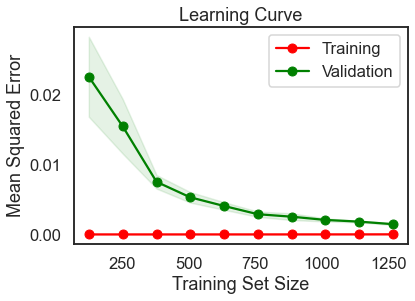

In [656]:
train_evaluate_xgb(X_train, y_train, X_test, y_test, X_val, y_val)

## HyperParameter Tuning to find the best hyperparameters

In [657]:
def tune_hyperparameters_xgb(X_train, y_train, X_test, y_test, X_val, y_val):
   
    param_grid = {
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9],
        'n_estimators': [100, 500, 1000]
    }

    
    xgb_model = xgb.XGBRegressor()
    grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

   
    best_params = grid_search.best_params_
    print('Best Hyperparameters:', best_params)

   
    xgb_best = xgb.XGBRegressor(**best_params)
    start = timer()
    xgb_best.fit(X_train, y_train)
    end = timer()
    print('Training duration:', end - start, 'seconds')

    
    y_pred = xgb_best.predict(X_val)

   
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

   
    print(f'Mean Squared Error: {mse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')

  
    plot_learning_curvexgb(xgb_best, X_train, y_train, 'Learning Curve')

    
    test_scores = grid_search.cv_results_['mean_test_score']
    learning_rates = [params['learning_rate'] for params in grid_search.cv_results_['params']]
    error_rates = [-score for score in test_scores]

    plt.plot(learning_rates, error_rates, 'o-')
    plt.xlabel('Learning Rate')
    plt.ylabel('Mean Squared Error')
    plt.title('Error Rate vs. Learning Rate')
    plt.show()

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 1000}
Training duration: 1.145480100007262 seconds
Mean Squared Error: 9.539630469451135
Mean Absolute Error: 2.478964213219125
R-squared: -0.7710097634850017


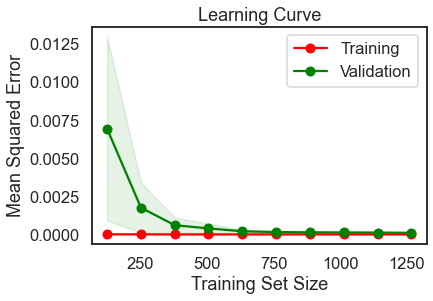

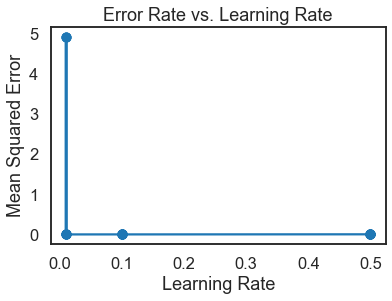

In [658]:
tune_hyperparameters_xgb(X_train, y_train, X_test, y_test, X_val, y_val)